In [7]:
from langgraph.graph import StateGraph
from IPython.display import Image, display  
from typing import TypedDict, List, Dict, Union

In [8]:
# defining the agent state
class AgentState(TypedDict):
    name: str
    values: List[int]
    operation: str
    result: Union[str,int,float]


In [25]:
# defining the node
from  functools import reduce

def perform_arithmetic_operation(state: AgentState) -> AgentState:

    operation = state.get("operation")
   
    if operation == '+':
        result = reduce(lambda a,b: a+b, state.get('values'))
        print(result)
    elif operation == '-':
        result = reduce(lambda a,b: a-b, state.get('values'))
    elif operation == '*':
        result = reduce(lambda a,b: a*b, state.get('values'))
    elif operation == '/':
        result = reduce(lambda a,b: a/b, state.get('values'))
    else:
        result = "Invald Operation"

    state['result'] = f'''Hi {state.get('name')}, your answer is {result}'''
    return state

In [26]:
# defining the graph and setting the start and endpoints

graph = StateGraph(AgentState)

graph.add_node(node='arithmetic_operation', action=perform_arithmetic_operation)

graph.set_entry_point("arithmetic_operation")
graph.set_finish_point("arithmetic_operation")

app = graph.compile()

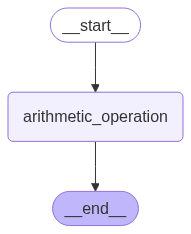

In [27]:
# displaying the graph using IPython Library

display(Image(app.get_graph().draw_mermaid_png()))

In [28]:
# invoking the graph

initial_state = {"name": "Eswar", "operation":"+", "values":[1,2,3,4,5]}

result = app.invoke(initial_state)
print(result)

15
{'name': 'Eswar', 'values': [1, 2, 3, 4, 5], 'operation': '+', 'result': 'Hi Eswar, your answer is 15'}


In [29]:
initial_state = {"name": "Eswar", "operation":"-", "values":[1,2,3,4,5]}

result = app.invoke(initial_state)
print(result)

{'name': 'Eswar', 'values': [1, 2, 3, 4, 5], 'operation': '-', 'result': 'Hi Eswar, your answer is -13'}


In [30]:
initial_state = {"name": "Eswar", "operation":"*", "values":[1,2,3,4,5]}

result = app.invoke(initial_state)
print(result)

{'name': 'Eswar', 'values': [1, 2, 3, 4, 5], 'operation': '*', 'result': 'Hi Eswar, your answer is 120'}


In [31]:
initial_state = {"name": "Eswar", "operation":"/", "values":[1,2,3,4,5]}

result = app.invoke(initial_state)
print(result)

{'name': 'Eswar', 'values': [1, 2, 3, 4, 5], 'operation': '/', 'result': 'Hi Eswar, your answer is 0.008333333333333333'}
